[Reference](https://github.com/j-sadowski/FromRtoPython/blob/master/PartialDependencePlots.ipynb)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [2]:
boston_data = load_boston()
X = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
Y = pd.Series(boston_data.target)

In [3]:
#inspect the data
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#inspect
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
dtype: float64

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth = 5, random_state = 42, n_estimators = 100)
regr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [7]:
Y_predict = regr.predict(X_test)
Y_predict_train = regr.predict(X_train)

In [8]:
#default feature importance
print(regr.feature_importances_)

[0.03342251 0.00096077 0.00392177 0.00095641 0.01166467 0.52741224
 0.00768447 0.05744264 0.00244699 0.01190952 0.01322005 0.00812811
 0.32082985]


In [9]:
from sklearn.inspection import permutation_importance

perm_feature_importance = permutation_importance(regr, X_train, Y_train)

importance_df = pd.DataFrame({'feature_labels': X_train.columns,
                              'means' : perm_feature_importance['importances_mean'],
                              'stds' : perm_feature_importance['importances_std']})

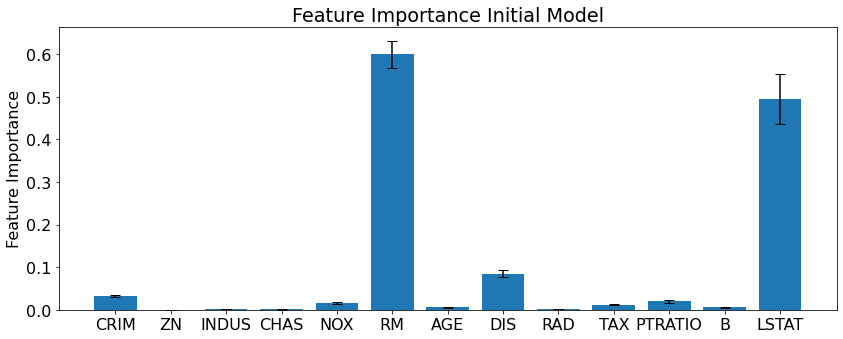

In [10]:
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (12,5)
fig, ax = plt.subplots()
x = np.arange(len(importance_df))
width = 0.77
rects1 = ax.bar(x, height = importance_df['means'], width = width, 
                yerr = importance_df['stds'], align='center', ecolor='black', 
                capsize=5)
ax.set_ylabel('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(importance_df['feature_labels'])
ax.set_title('Feature Importance Initial Model')
plt.tight_layout()

In [11]:
X_train_reduced = X_train.loc[:,['RM','DIS','LSTAT']]

from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth = 5, random_state = 42, n_estimators = 100)
regr.fit(X_train_reduced, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [12]:
perm_feature_importance = permutation_importance(regr, X_train_reduced, Y_train)

importance_df = pd.DataFrame({'feature_labels': X_train_reduced.columns,
                              'means' : perm_feature_importance['importances_mean'],
                              'stds' : perm_feature_importance['importances_std']})
importance_df

,feature_labels,means,stds
0,RM,0.665288,0.022322
1,DIS,0.162752,0.011391
2,LSTAT,0.637419,0.065686


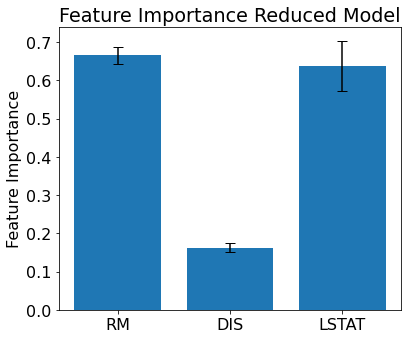

In [13]:
plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (6,5)
fig, ax = plt.subplots()
x = np.arange(len(importance_df))
width = 0.77
rects1 = ax.bar(x, height = importance_df['means'], width = width, 
                yerr = importance_df['stds'], align='center', ecolor='black', 
                capsize=5)
ax.set_ylabel('Feature Importance')
ax.set_xticks(x)
ax.set_xticklabels(importance_df['feature_labels'])
ax.set_title('Feature Importance Reduced Model')
plt.tight_layout()

In [14]:
from sklearn.metrics import mean_squared_error
X_test_reduced = X_test.loc[:,['RM','DIS','LSTAT']]
Y_predict = regr.predict(X_test_reduced)
Y_predict_train = regr.predict(X_train_reduced)


mse_train = mean_squared_error(Y_train, Y_predict_train)
print(mse_train)

mse = mean_squared_error(Y_test, Y_predict)
print(mse)

7.611092638588249
13.51516449063508


In [15]:
print(regr.score(X_train_reduced,Y_train))
print(regr.score(X_test_reduced,Y_test))

0.9123886908676555
0.815703432876385


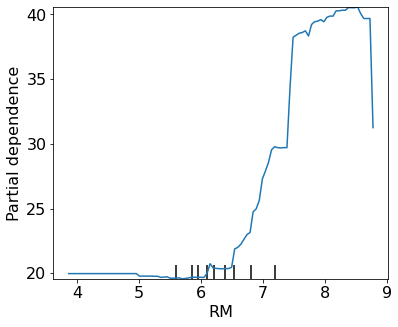

In [16]:
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(regr, X_train_reduced, features = ['RM'], percentiles = [0,1]);

In [17]:
def get_PDvalues(col_name, data, model, grid_resolution = 100):
    Xnew = data.copy()
    sequence = np.linspace(np.min(data[col_name]), np.max(data[col_name]), grid_resolution)
    Y_pd = []
    for each in sequence:
        Xnew[col_name] = each
        Y_temp = model.predict(Xnew)
        Y_pd.append(np.mean(Y_temp))
    return pd.DataFrame({col_name: sequence, 'PDs': Y_pd})

In [18]:
from sklearn.inspection import partial_dependence

vals, grid = partial_dependence(regr, X_train_reduced, features = ['RM'], percentiles = [0,1])
RM_PD_sklearn = pd.DataFrame({'x': grid[0], 'y': vals[0]})
RM_PD_mycode = get_PDvalues('RM', X_train_reduced, regr)

#no error between my calculations and sklearn calculations
print(np.sum((RM_PD_sklearn['y']-RM_PD_mycode['PDs'])**2))

0.0


In [19]:
def plot_PDP(col_name, data, model):
    df = get_PDvalues(col_name, data, model)
    plt.rcParams.update({'font.size': 16})
    plt.rcParams["figure.figsize"] = (6,5)
    fig, ax = plt.subplots()
    ax.plot(data[col_name], np.zeros(data[col_name].shape)+min(df['PDs'])-1, 'k|', ms=15)  # rug plot
    ax.plot(df[col_name], df['PDs'], lw = 2)
    ax.set_ylabel('Partial Dependence')
    return ax

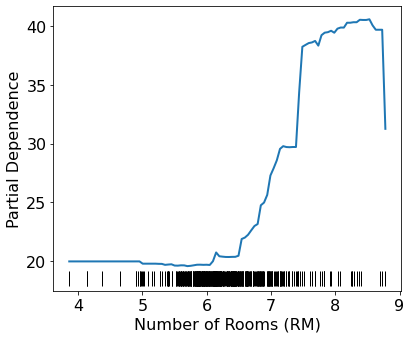

In [20]:
ax = plot_PDP('RM', X_train_reduced, regr)
ax.set_xlabel('Number of Rooms (RM)')
plt.tight_layout();

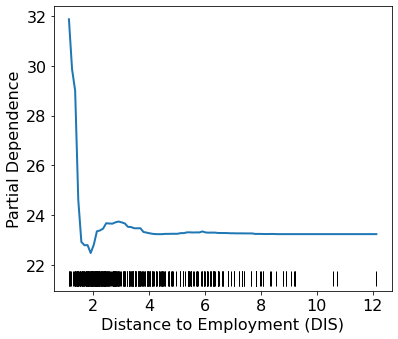

In [21]:
ax = plot_PDP('DIS', X_train_reduced, regr)
ax.set_xlabel('Distance to Employment (DIS)')
plt.tight_layout();

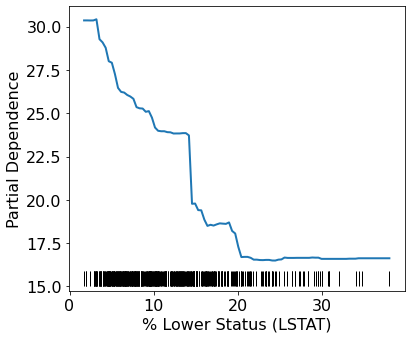

In [22]:
ax = plot_PDP('LSTAT', X_train_reduced, regr)
ax.set_xlabel('% Lower Status (LSTAT)')
plt.tight_layout();

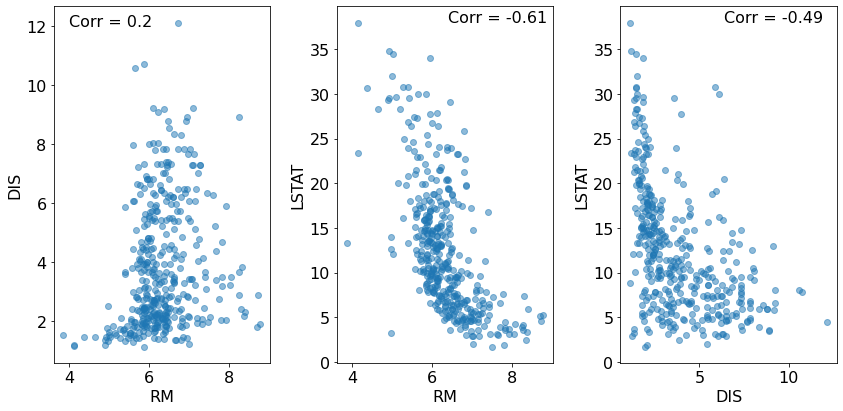

In [23]:


#plot correlations among features
corrs = X_train_reduced.corr()

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))
ax1.scatter(X_train_reduced['RM'],X_train_reduced['DIS'], alpha = 0.5)
ax1.set_xlabel('RM')
ax1.set_ylabel('DIS')
ax1.annotate('Corr = ' + str(round(corrs.iloc[0,1],2)), xy = (4,12))

ax2.scatter(X_train_reduced['RM'],X_train_reduced['LSTAT'], alpha = 0.5);
ax2.set_xlabel('RM')
ax2.set_ylabel('LSTAT')
ax2.annotate('Corr = ' + str(round(corrs.iloc[0,2],2)), xy = (6.4,38))

ax3.scatter(X_train_reduced['DIS'],X_train_reduced['LSTAT'], alpha = 0.5);
ax3.set_xlabel('DIS')
ax3.set_ylabel('LSTAT');
ax3.annotate('Corr = ' + str(round(corrs.iloc[1,2],2)), xy = (6.4,38))

fig.tight_layout();

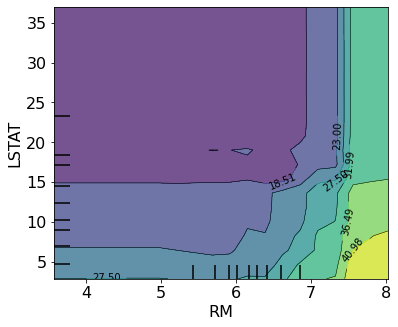

In [24]:
RM_LSTATdisp = plot_partial_dependence(regr, X_test_reduced, features = [(0,2)], percentiles = [0,1],
                       grid_resolution = 20)

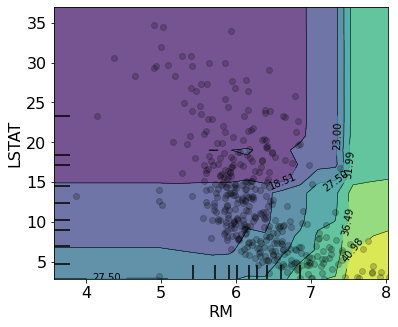

In [25]:
fig, ax = plt.subplots(figsize=(6, 5))
RM_LSTATdisp.plot(ax = ax)
plt.scatter(X_train_reduced['RM'],X_train_reduced['LSTAT'], alpha = 0.2, color = 'black');